# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
tesla = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/Google Trends Data Viz (start)/TESLA Search Trend vs Price.csv')
btc_search = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/Google Trends Data Viz (start)/Bitcoin Search Trend.csv')
btc_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/Google Trends Data Viz (start)/Daily Bitcoin Price.csv')
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/Google Trends Data Viz (start)/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

We will answer these question: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
print(tesla.shape)
tesla['MONTH'].head()

(124, 3)


0    2010-06-01
1    2010-07-01
2    2010-08-01
3    2010-09-01
4    2010-10-01
Name: MONTH, dtype: object

There are 124 rows and 3 columns.

In [5]:
max_tesla_web_search = tesla['TSLA_WEB_SEARCH'].max()
min_tesla_web_search = tesla['TSLA_WEB_SEARCH'].min()
print(f'Largest value for Tesla in Web Search: {max_tesla_web_search}')
print(f'Smallest value for Tesla in Web Search: {min_tesla_web_search}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [6]:
tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


The periodicity of the tiume series data is monthly.

### Unemployment Data

In [7]:
print(unemployment.shape)
unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


There are 181 rows and 3 columns

In [8]:
max_UE_web_search = unemployment["UE_BENEFITS_WEB_SEARCH"].max()
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {max_UE_web_search} ')

Largest value for "Unemployemnt Benefits" in Web Search: 100 


### Bitcoin
With the Bitcoin data we see that we have two different .csv files. One of them has the day-by-day closing price and the trade volume of Bitcoin across 2204 rows. The other has the monthly search volume from Google Trends.

In [9]:
print(btc_search.shape)
btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [10]:
print(btc_price.shape)
btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [11]:
max_btc_search = btc_search["BTC_NEWS_SEARCH"].max()
print(f'largest BTC News Search: {max_btc_search}')

largest BTC News Search: 100


### What do the Search Numbers mean?


We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.



For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

# Data Cleaning

### Check for Missing Values

We will answer these questions: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [12]:
print(f'Missing values for Tesla?: {tesla.isna().values.any()}')
print(f'Missing values for U/E?: {unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [13]:
print(f'Missing values for BTC price?:{btc_price.isna().values.any()}')

Missing values for BTC price?:True


In [14]:
print(f'Number of missing values:{btc_price.isna().any().sum()}')
btc_price[btc_price.CLOSE.isna()]

Number of missing values:2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


Let's remove any missing values that you found. 

In [15]:
btc_price.dropna(inplace = True)
btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [16]:
tesla["MONTH"] = pd.to_datetime(tesla["MONTH"])
type(tesla["MONTH"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
unemployment["MONTH"] = pd.to_datetime(unemployment["MONTH"])
type(unemployment["MONTH"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
btc_search["MONTH"] = pd.to_datetime(btc_search["MONTH"])
type(btc_search["MONTH"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
btc_price.DATE = pd.to_datetime(btc_price.DATE)
type(btc_price.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

They all have `datetime` type. We are all good.

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [20]:
btc_monthly = btc_price.resample('M', on='DATE').last()

In [21]:
btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [22]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

We plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. We label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

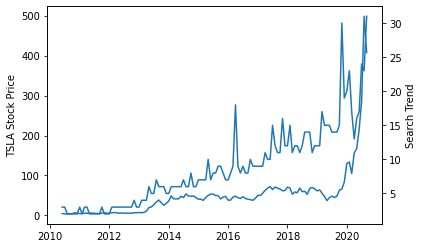

In [23]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')
 
ax1.plot(tesla.MONTH, tesla.TSLA_USD_CLOSE)
ax2.plot(tesla.MONTH, tesla.TSLA_WEB_SEARCH)

It looks good. But it wil lbe better if we dd colours to style the chart. This will help differentiate the two lines and the axis labels. 

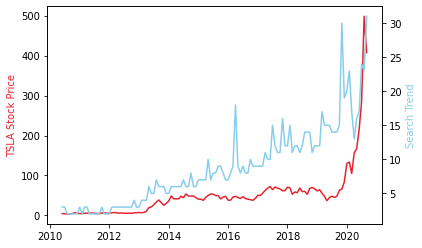

In [24]:
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour
 
ax1.plot(tesla.MONTH, tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(tesla.MONTH, tesla.TSLA_WEB_SEARCH, color='skyblue')



Let's make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

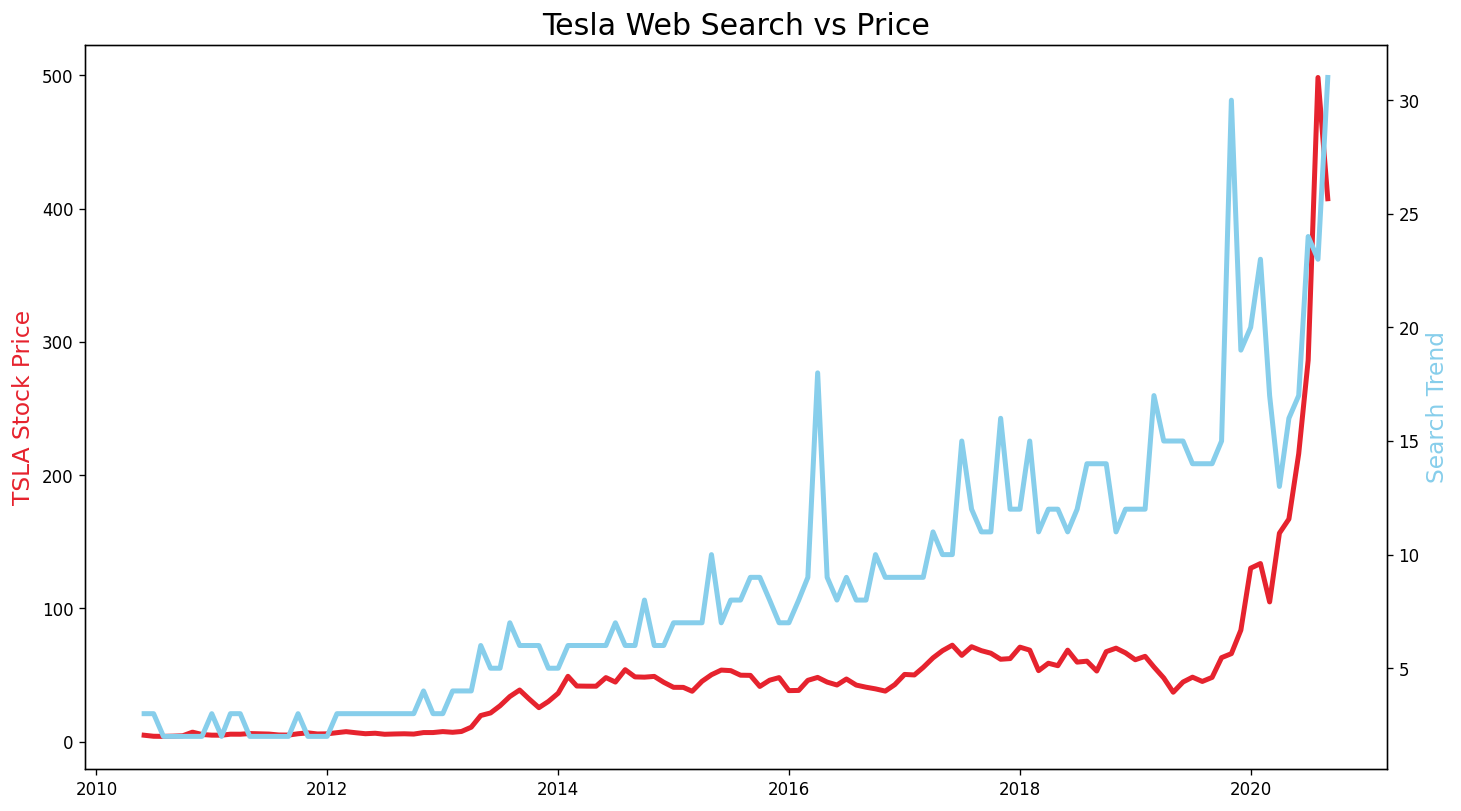

In [25]:
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.plot(tesla.MONTH, tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(tesla.MONTH, tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
 
# Displays chart explicitly
plt.show()

How to add tick formatting for dates on the x-axis. 

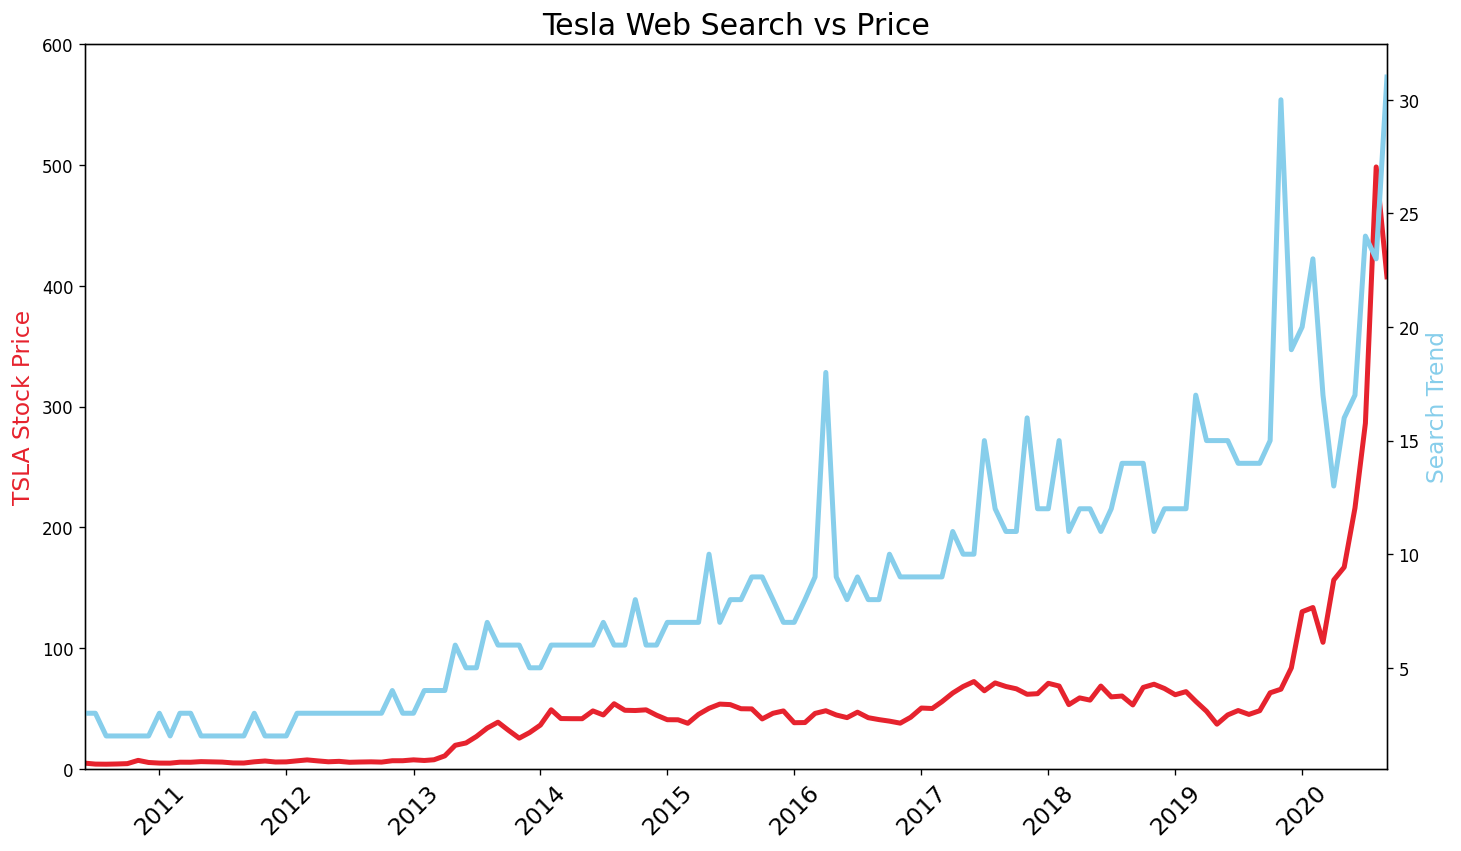

In [26]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([tesla.MONTH.min(), tesla.MONTH.max()])
 
ax1.plot(tesla.MONTH, tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(tesla.MONTH, tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
 
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

We will Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

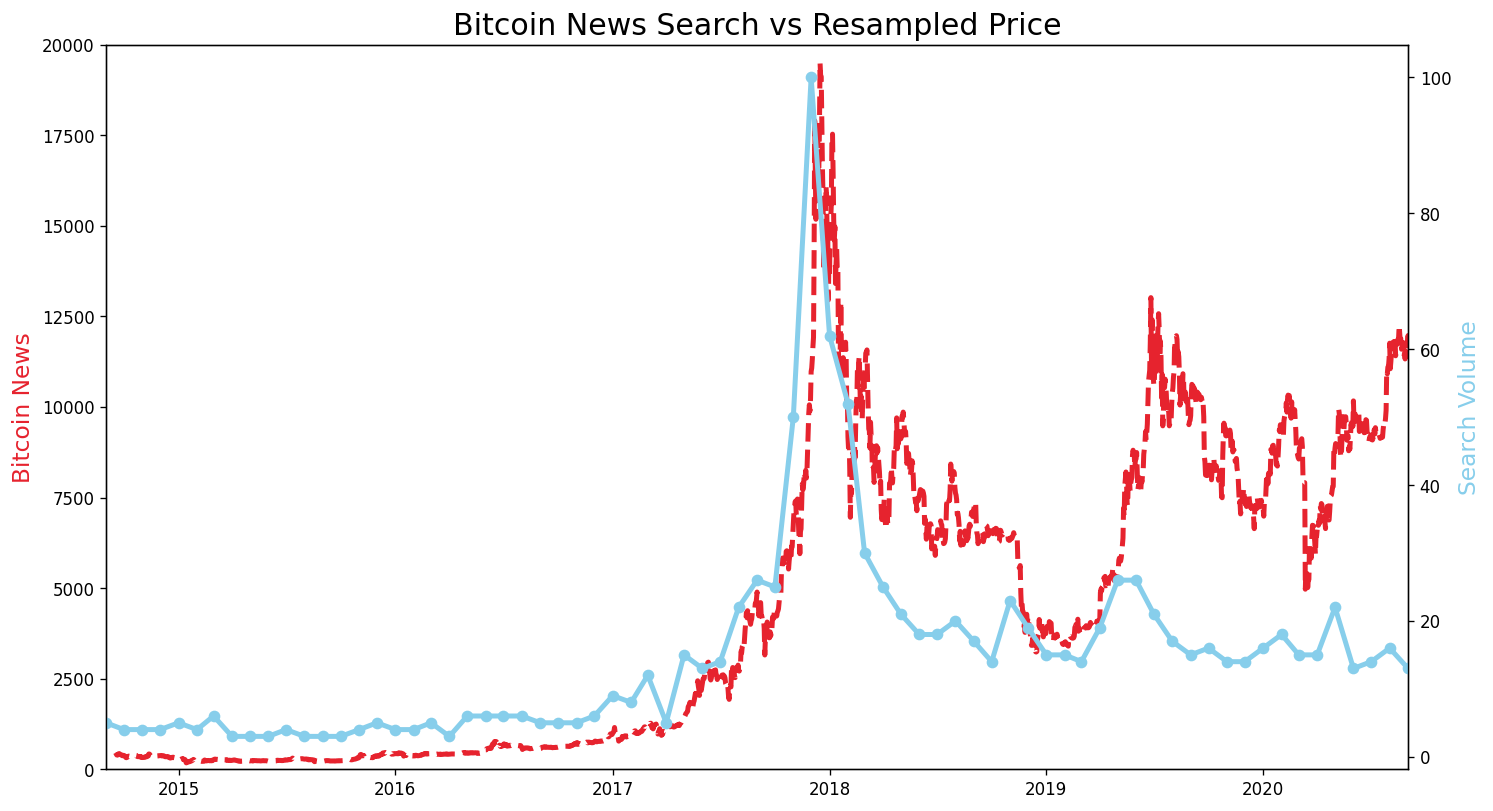

In [27]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
#create 2 axes that share the same x-axis
ax1 = plt.gca() #get currenet axis
ax2 = ax1.twinx() #twin axis

ax1.set_ylabel('Bitcoin News', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Volume', color='skyblue', fontsize=14)

ax1.set_ylim([0, 20000])
ax1.set_xlim([btc_search.MONTH.min(), btc_search.MONTH.max()])

ax1.plot(btc_price.DATE, btc_price.CLOSE, color='#E6232E', linewidth=3, linestyle='dashed')
ax2.plot(btc_search.MONTH, btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')
 

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

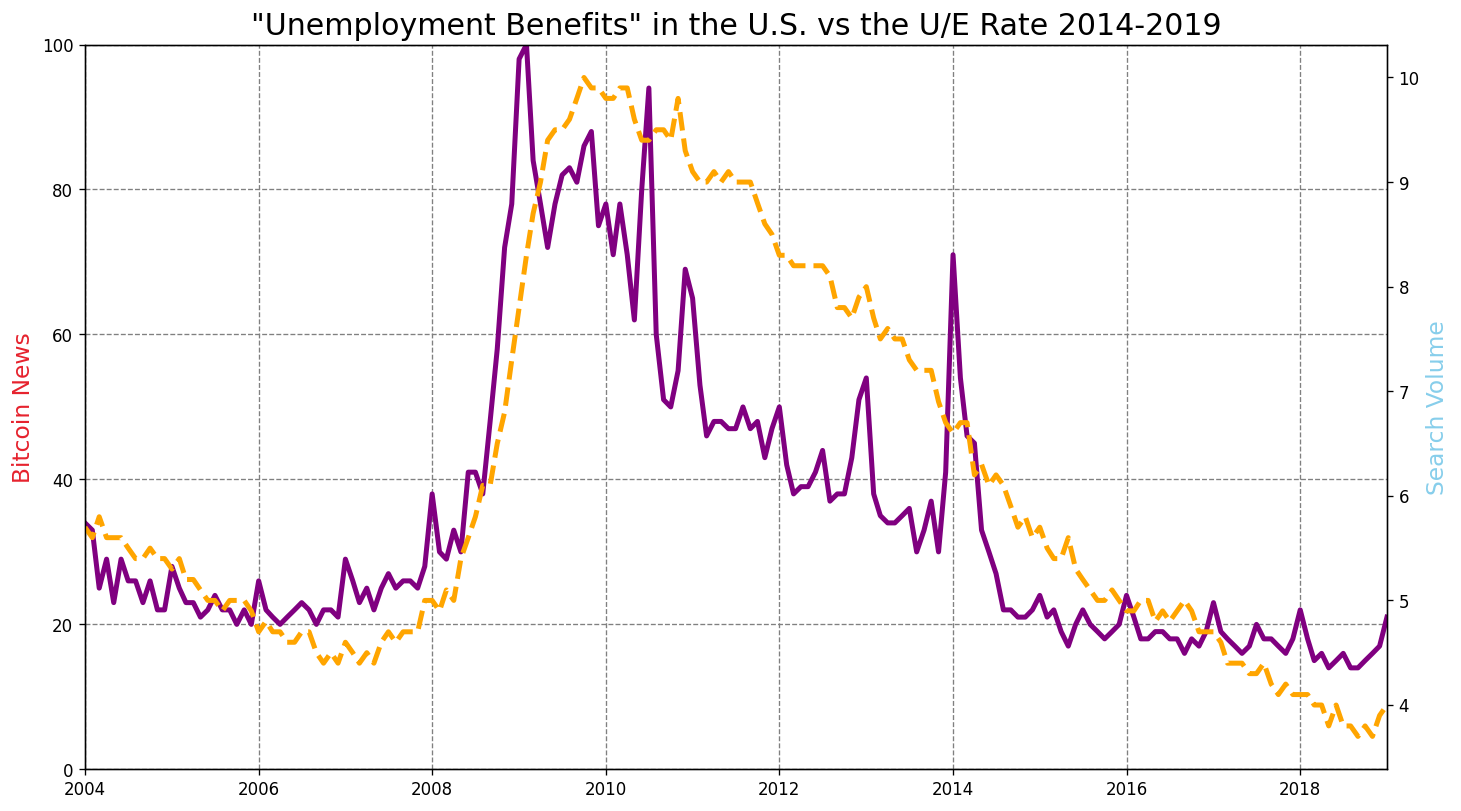

In [28]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('"Unemployment Benefits" in the U.S. vs the U/E Rate 2014-2019', fontsize=18)
#create 2 axes that share the same x-axis
ax1 = plt.gca() #get currenet axis
ax2 = ax1.twinx() #twin axis

ax1.set_ylim((0,100))
ax1.set_ylabel('Bitcoin News', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Volume', color='skyblue', fontsize=14)

ax1.set_xlim([unemployment.MONTH.min(), unemployment.MONTH.max()])

ax1.plot(unemployment.MONTH, unemployment.UE_BENEFITS_WEB_SEARCH, color='purple', linewidth=3)
ax2.plot(unemployment.MONTH, unemployment.UNRATE, color='orange', linewidth=3, linestyle = "--")
ax1.grid(color='grey', linestyle='--')

Interestingly, the big spike in searches for Unemployment benefits at the end of 2013 was not accompanied by a big increase in the unemployment rate. Something else must have been going on around that time.

The search volume moves around quite a bit - month on month. Perhaps we can smooth out the search volumes to get a slightly different picture 

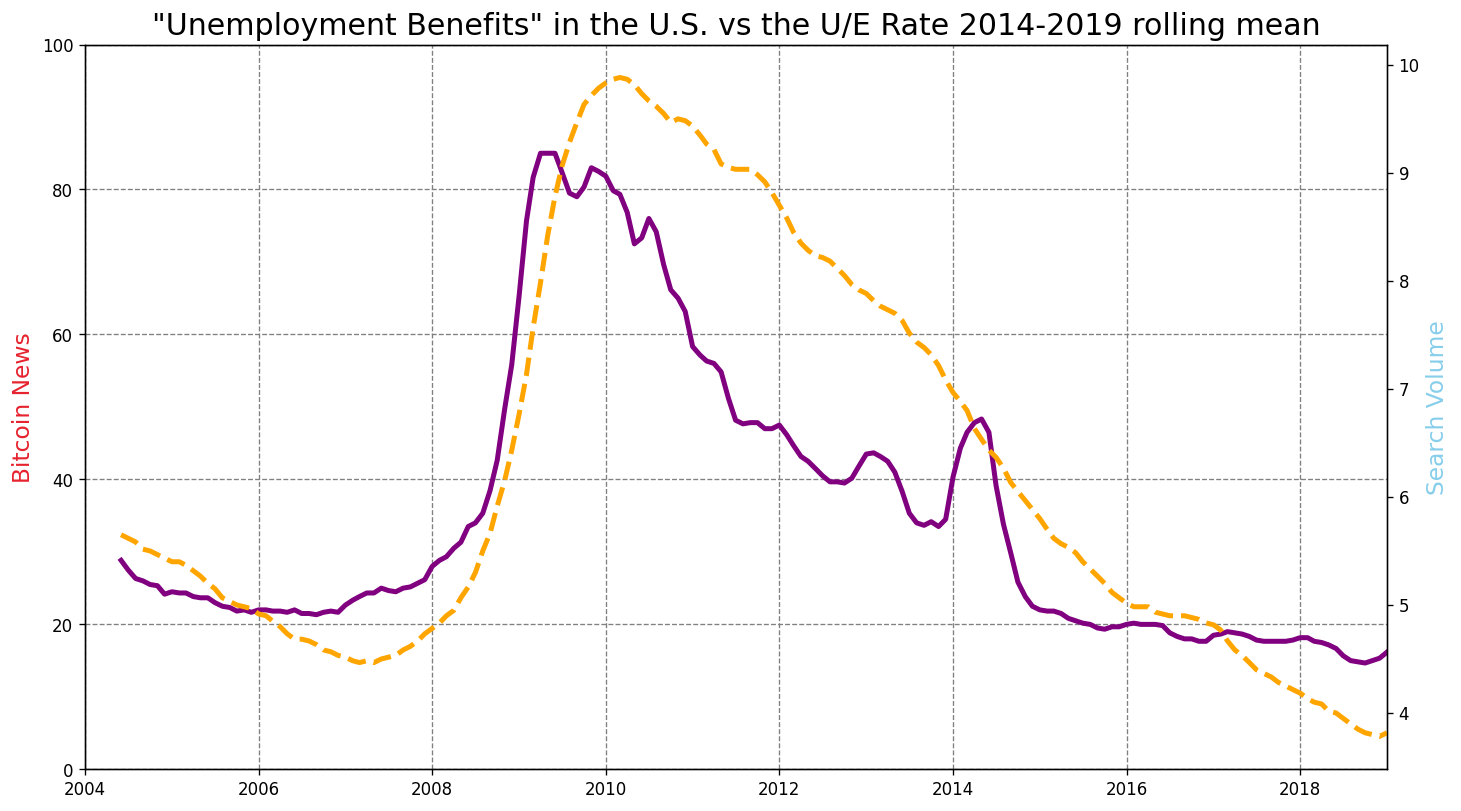

In [29]:
roll_df = unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

plt.figure(figsize=(14,8), dpi=120)
plt.title('"Unemployment Benefits" in the U.S. vs the U/E Rate 2014-2019 rolling mean', fontsize=18)
#create 2 axes that share the same x-axis
ax1 = plt.gca() #get currenet axis
ax2 = ax1.twinx() #twin axis

ax1.set_ylim((0,100))
ax1.set_ylabel('Bitcoin News', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Volume', color='skyblue', fontsize=14)

ax1.set_xlim([unemployment.MONTH.min(), unemployment.MONTH.max()])

ax1.plot(unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='purple', linewidth=3)
ax2.plot(unemployment.MONTH, roll_df.UNRATE, color='orange', linewidth=3, linestyle = "--")
ax1.grid(color='grey', linestyle='--')

What is this telling us? We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up.

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

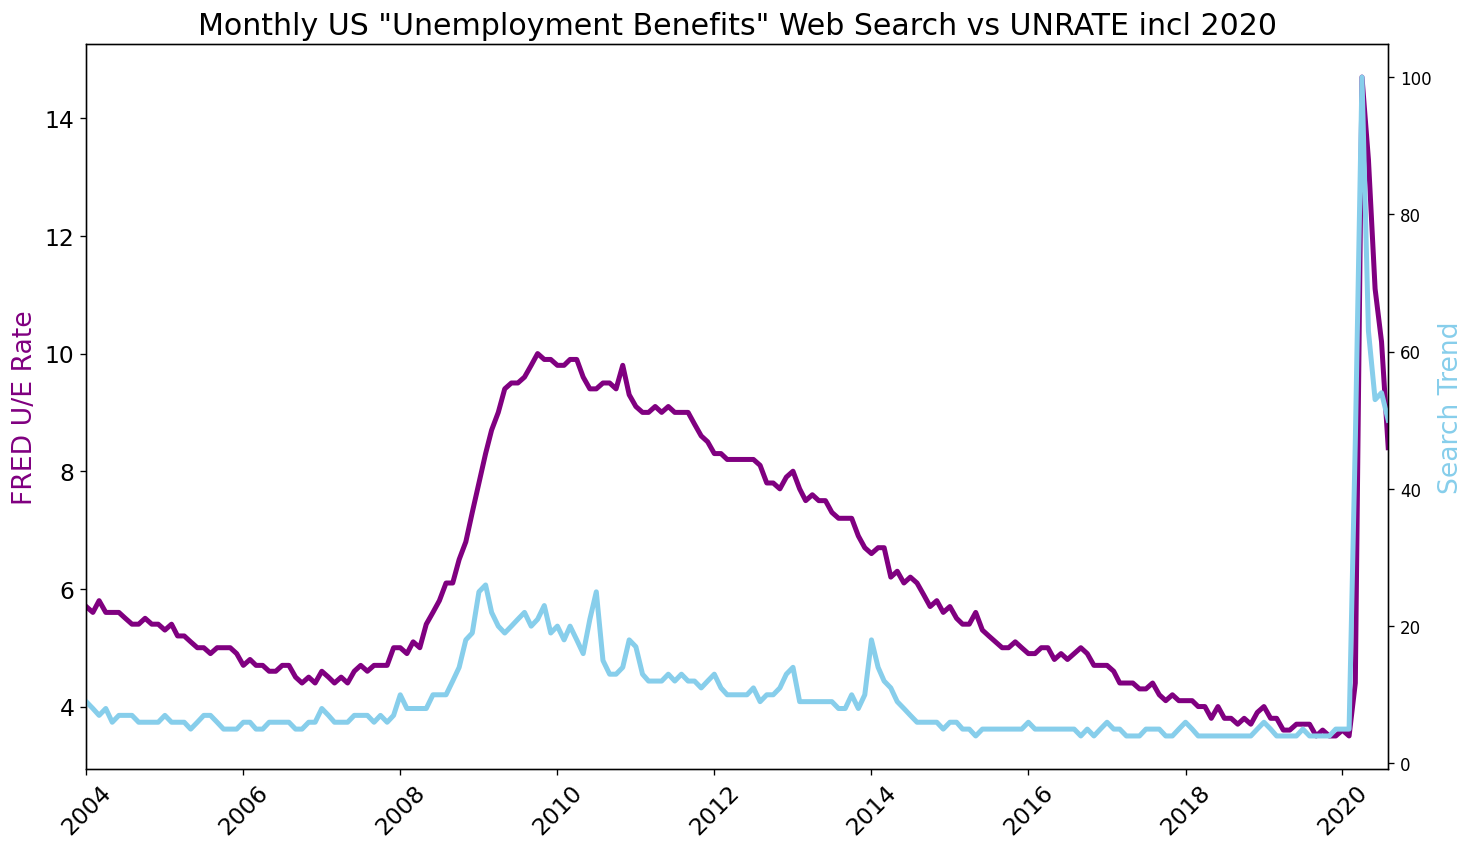

In [30]:
df_ue_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/Google Trends Data Viz (start)/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis.